# Fig01b

# Figure of the measured Ghost Rays

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 
import matplotlib 
from astropy.io import fits
import ast
import matplotlib.patches as patches
import astropy.units as u
import skimage.transform

### Scale:

In [2]:
CCD_PIXEL_PITCH = 13.5 * u.micron
binning = 2.
distance = 2. * u.m
s = np.arctan(binning * CCD_PIXEL_PITCH / distance).to(u.arcmin)
resol = 1024
Dwidth=8.25/s.value #detector width in pixels
Flux_X2_low, Flux_X2_up = [], []
Flux_X2N_low, Flux_X2N_up = [], []
power = np.array([0.85,0.65,0.5,0.3,0.1,0.03])/0.03
offaxis = [30.,26.,22.,18.,14.,10.]

### Defining transparent colors:

In [3]:
tred = {'red' :  ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 1.0, 0.0))}

tgreen = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}

tblack = {'red' :  ((0.0, 0.0, .0), 
                    (1.0, .2, 0.0)), 
        'green': ((0.0, 0.0, .0), 
                    (1., .2, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1., .2, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 1.0, 0.0))}


tred   = LinearSegmentedColormap('tred', tred) 
tgreen = LinearSegmentedColormap('tgreen', tgreen) 
tblack = LinearSegmentedColormap('tblack', tblack) 

### 30 arcmin

In [4]:
'''Scale and Center Parameters'''
X, Y = 0., -30.
X0, Y0 = 443, 83 ## Calib Sep 2017
X1, Y1 = 384, 272 ## Calib Mar 2018
angle0 = 1.0
angle1 = 10.0

### X2 10-Shell Alone

In [5]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/darks/FOXSI3_X2_T6Sx6_CCD_darks1.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/darks/FOXSI3_X2_T6Sx6_CCD_darks2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
X4Darks = (Darks1 + Darks2)*0.5
'''Data'''
FX2_X0_Ym30 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2017Sep/X2-10Shells/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_30kV_0p85mA_0arcminX_-30arcminY.fits')
DX2_X0_Ym30 = np.average(FX2_X0_Ym30[0].data, axis=0)
DX2_X0_Ym30 = skimage.transform.rotate(((DX2_X0_Ym30-X4Darks)/(DX2_X0_Ym30-X4Darks).max()),angle0,center=(X0,Y0))

### Plotting

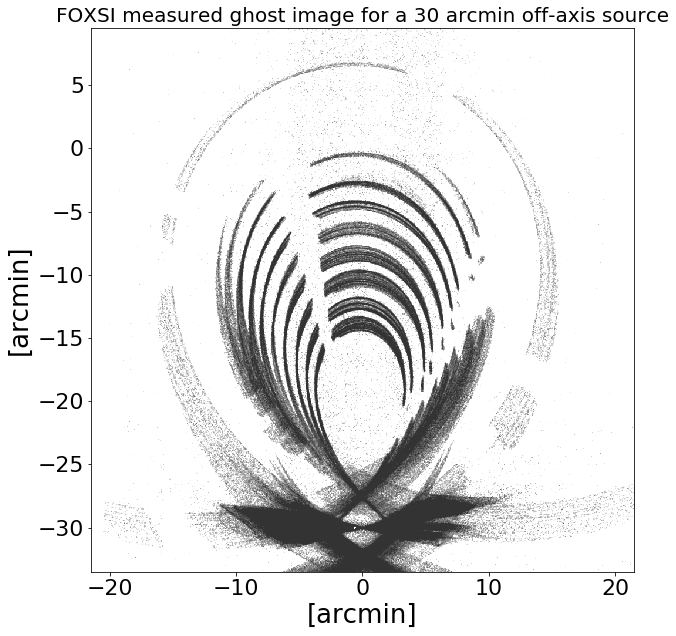

In [11]:
'''Plotting'''
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(DX2_X0_Ym30, origin='lower',cmap=tblack,
           norm=matplotlib.colors.LogNorm(),
          extent=[-X0*s.value+X,(-X0+resol)*s.value+X,-Y0*s.value+Y,(-Y0+resol)*s.value+Y],
          vmin=0.0025,vmax=0.02)

#rect = patches.Rectangle((-8.25,-8.25),16.5,16.5,linewidth=2,edgecolor='k',facecolor='none')
#ax.add_patch(rect)
ax.set_xlim((-21.5,21.5))
ax.set_ylim((-33.5,9.5))
ax.set_xlabel('[arcmin]',fontsize=26)
ax.set_ylabel('[arcmin]',fontsize=26)
ax.set_title('FOXSI measured ghost image for a 30 arcmin off-axis source', fontsize=20)
ax.tick_params(labelsize=22)
#ax.axvline(0,color='grey',linewidth=1)
#ax.axhline(0,color='grey',linewidth=1)
#ax.annotate('Optical axis',xy=[.2,0.1],xytext=(-20, 25),color='black',alpha=0.8,fontsize=20,
#            textcoords='offset points',arrowprops=dict(
#            arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
#            facecolor='grey',ec='grey',))
